# モジュールのインポート

In [32]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
target_path = '/Users/masared/Desktop/デスクトップ - 山根将聖のMacBook Pro/iCloud Drive（アーカイブ） - 1/Desktop/OkadaLab/kenkyu/磁区パターン画像/Pre_Coercive/250724domain_mamada_ana'
sys.path.append(target_path)
for path in sys.path:
    print(path)



/Users/masared/.pyenv/versions/3.12.1/lib/python312.zip
/Users/masared/.pyenv/versions/3.12.1/lib/python3.12
/Users/masared/.pyenv/versions/3.12.1/lib/python3.12/lib-dynload

/Users/masared/.pyenv/versions/3.12.1/lib/python3.12/site-packages
/Users/masared/Desktop/デスクトップ - 山根将聖のMacBook Pro/iCloud Drive（アーカイブ） - 1/Desktop/OkadaLab/kenkyu/磁区パターン画像/Pre_Coercive/250724domain_mamada_ana
/Users/masared/Desktop/デスクトップ - 山根将聖のMacBook Pro/iCloud Drive（アーカイブ） - 1/Desktop/OkadaLab/kenkyu/磁区パターン画像/Pre_Coercive/250724domain_mamada_ana
/Users/masared/Desktop/デスクトップ - 山根将聖のMacBook Pro/iCloud Drive（アーカイブ） - 1/Desktop/OkadaLab/kenkyu/磁区パターン画像/Pre_Coercive/250724domain_mamada_ana
/Users/masared/Desktop/デスクトップ - 山根将聖のMacBook Pro/iCloud Drive（アーカイブ） - 1/Desktop/OkadaLab/kenkyu/磁区パターン画像/Pre_Coercive/250724domain_mamada_ana


In [34]:
file_name = '250724pomain_data_features_mamada.pkl'
full_file_path = os.path.join(target_path, file_name)
domain_df=pd.read_pickle(full_file_path)

In [35]:
domain_df

,neg_largest_byarea_perimeter,neg_total_perimeter,neg_largest_byarea_area,neg_total_area,neg_largest_byarea_excircle_rad,neg_total_byarea_excircle_rad,neg_tamura_contrast,neg_tamura_coarseness,neg_tamura_directionality,neg_hu0,...,neg_hu4,neg_hu5,neg_hu6,neg_largest_byarea_area_per_neg_total_perimeter,neg_largest_byarea_area_per_neg_largest_byarea_excircle_rad,neg_largest_byarea_area_per_neg_total_area,coercivity,coercivity_pattern,parameters,raw_features
0,1763.238816,1868.644667,31268.0,32826.0,129.042252,164.766991,0.499998,16.803528,17.303525,0.200562,...,2.895017e-09,-1.845766e-07,-4.730388e-10,16.732983,242.308233,0.952538,-0.1185,"[[0.98993754, 0.98396784, 0.98098993, 0.985392...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 1, 'pos_areas': [32710...."
1,1936.417531,2631.690178,27992.0,32751.0,135.533035,283.164394,0.500000,17.020554,17.520553,0.236110,...,2.627555e-10,1.844692e-07,1.688705e-10,10.636510,206.532673,0.854691,-0.2132,"[[0.82320654, 0.9948646, 0.95157474, 0.9358536...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 6, 'pos_areas': [4731.0..."
2,1068.756493,3251.974215,11855.0,32717.0,123.952911,501.797334,0.499998,16.330917,16.830916,0.343461,...,3.187295e-08,-1.258402e-06,-1.127251e-08,3.645478,95.641158,0.362350,-0.1023,"[[-0.97068506, -0.98829323, -0.99075335, -0.98...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 6, 'pos_areas': [32380...."
3,1907.901766,2947.254433,21018.0,32680.0,136.662796,314.386645,0.499995,17.216568,17.716563,0.278146,...,4.227291e-08,7.022826e-07,2.886744e-08,7.131383,153.794600,0.643146,-0.1848,"[[-1.0072753, -1.0167991, -0.9996986, -0.98464...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 6, 'pos_areas': [30047...."
4,436.475180,4508.714295,4200.0,32500.0,76.034630,727.836516,0.499950,16.509094,17.009044,0.327195,...,2.574939e-09,-5.102602e-07,9.154671e-09,0.931529,55.237988,0.129231,-0.1171,"[[0.92765355, 0.94978046, 0.96816736, 0.978237...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 3, 'pos_areas': [31563...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,1166.691522,3005.455638,13684.0,32721.0,126.001091,384.720086,0.499998,17.186981,17.686980,0.319282,...,2.994666e-08,2.024621e-06,4.393340e-09,4.553053,108.602234,0.418202,-0.0489,"[[0.98006713, 0.977694, 0.97725624, 0.98108226...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 4, 'pos_areas': [26280...."
4997,1024.933116,2455.583963,15116.0,32740.0,110.584908,321.942964,0.499999,16.325989,16.825988,0.366762,...,-1.994777e-07,-1.044347e-04,-5.980209e-06,6.155766,136.691347,0.461698,-0.1625,"[[-0.99484676, -0.9981995, -1.0053976, -1.0052...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 5, 'pos_areas': [1269.0..."
4998,521.386868,3856.738054,5296.0,32543.0,67.900764,608.147257,0.499965,16.109390,16.609355,0.335882,...,-7.264346e-09,-4.723032e-07,3.707516e-08,1.373181,77.996176,0.162739,-0.1504,"[[-0.99188113, -0.983229, -0.98701096, -0.9927...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 7, 'pos_areas': [32558...."
4999,669.913780,2406.761295,9512.0,32766.0,81.180534,329.862847,0.500000,17.715057,18.215057,0.415226,...,7.915917e-10,9.557226e-07,-2.121200e-09,3.952199,117.170946,0.290301,-0.0243,"[[-0.9704655, -0.9714497, -0.97113496, -0.9699...","{'nst': 256, 'n_snap_high': 250, 'alpha': 1.0,...","{'pos_num_components': 5, 'pos_areas': [31959...."


# 0を閾値に-1か1を返す関数


In [36]:
import numpy as np

def binarize_to_plus_minus_one(arr):
    """
    NumPy配列を閾値0で2値化し、+1と-1の配列に変換する関数。

    この関数は、配列の各要素をチェックし、以下のルールに従って新しい配列を生成します。
    - 元の要素が0より大きい場合 -> 1
    - 元の要素が0以下の場合    -> -1

    Args:
        arr (np.ndarray): 入力となるNumPy配列。

    Returns:
        np.ndarray: +1と-1の整数で構成された、新しいNumPy配列。
    """
    # np.where(condition, x, y) を使うのが最も効率的で推奨される方法です。
    # condition: arr > 0 (要素が0より大きいかどうかのTrue/False配列)
    # x: conditionがTrueの場合に設定する値 (1)
    # y: conditionがFalseの場合に設定する値 (-1)
    return np.where(arr > 0, 1, -1)

# --- 関数の使い方・実行サンプル ---
if __name__ == '__main__':
    # サンプルとなるNumPy配列を作成 (正の値, 0, 負の値を含む)
    sample_array = np.array([
        [150, -30, 0],
        [-10.5, 25.2, -0.1],
        [1, 1, -99]
    ])

    print("--- 元の配列 ---")
    print(sample_array)

    # 作成した関数を呼び出して、2値化を実行
    binarized_array = binarize_to_plus_minus_one(sample_array)

    print("\n--- 関数を使って+1/-1に2値化した後の配列 ---")
    print(binarized_array)
    
    # フーリエ変換などで使えるデータ形式になっていることを確認
    print("\n変換後の配列のデータ型:", binarized_array.dtype)

--- 元の配列 ---
[[ 1.50e+02 -3.00e+01  0.00e+00]
 [-1.05e+01  2.52e+01 -1.00e-01]
 [ 1.00e+00  1.00e+00 -9.90e+01]]

--- 関数を使って+1/-1に2値化した後の配列 ---
[[ 1 -1 -1]
 [-1  1 -1]
 [ 1  1 -1]]

変換後の配列のデータ型: int64


In [37]:
sample_image=domain_df["coercivity_pattern"][100]
img=binarize_to_plus_minus_one(sample_image)
print(sample_image)
print(img)
np.sum(img)


[[0.9980222  0.9909147  0.98618174 ... 0.9713617  0.97775644 0.9930443 ]
 [0.9877645  0.98028576 0.9878047  ... 0.9524016  0.97267675 0.99191844]
 [0.98952097 0.9871264  0.9925069  ... 0.9659004  0.98184276 0.9935188 ]
 ...
 [0.99554193 0.9833027  0.9595736  ... 0.98946565 0.9973159  1.0008887 ]
 [0.9993366  0.98704374 0.9517711  ... 0.99837005 0.9954879  0.99687207]
 [1.003923   0.9962465  0.9702837  ... 0.9956518  0.9890956  0.99440217]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


np.int64(-58)

# 2次元離散フーリエ変換をしてみる

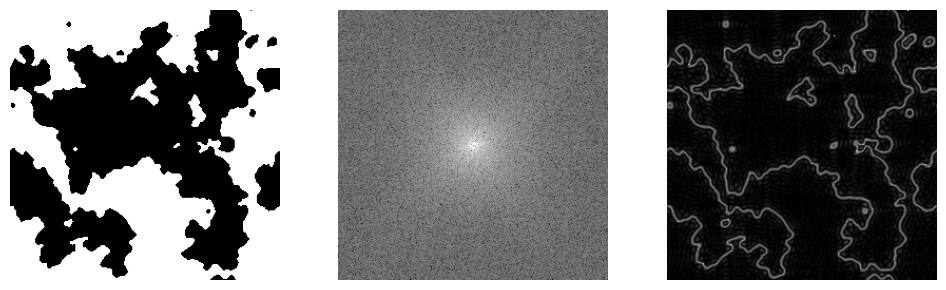

In [41]:
f = np.fft.fft2(img)                        # 2Dフーリエ変換
f_shift = np.fft.fftshift(f)                # 直流成分を画像中心に移動させるためN/2シフトさせる
mag = 20 * np.log(np.abs(f_shift))          # 振幅成分を計算

# 周波数領域にマスクをかける
rows, cols = img.shape                      # 画像サイズを取得
crow, ccol = int(rows / 2), int(cols / 2)   # 画像中心を計算
mask = 30                                   # マスクのサイズ
f_shift[crow-mask:crow+mask,
        ccol-mask:ccol+mask] = 0
 
# 2D逆フーリエ変換によりフィルタリング後の画像を得る
f_ishift = np.fft.ifftshift(f_shift)        # シフト分を元に戻す
img_back = np.fft.ifft2(f_ishift)           # 逆フーリエ変換
img_back = np.abs(img_back)                 # 実部を計算する
 
# ここからグラフ表示
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(img, cmap='gray')
ax2.imshow(mag, cmap='gray')
ax3.imshow(img_back, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.tight_layout()
plt.show()
plt.close()

 

In [39]:
f_shift

array([[ 66.         +0.j        , -32.290292  +11.33566504j,
        -14.99262766+36.94760491j, ...,  -0.42191677-15.13702654j,
        -14.99262766-36.94760491j, -32.290292  -11.33566504j],
       [ -4.75122976-37.3399912j ,   5.66810228 -1.51971979j,
         18.89638326-26.61251031j, ...,   4.95748669-11.99805077j,
         22.74136021 +2.52891828j, -41.69493724+47.39080116j],
       [ -7.48946233 +2.60414116j,  24.80207483-16.32925106j,
          0.51056758-37.19470167j, ...,  23.16204238+40.23040631j,
        -56.5773464 +45.27388314j,  16.0451456 -19.17911705j],
       ...,
       [-26.06928944-28.56366281j, -20.6943671 -15.1998286j ,
         37.32626865+53.39215761j, ..., -12.8476427 +35.88335735j,
         33.64429162+29.65555636j,  -0.0819232 -48.75046572j],
       [ -7.48946233 -2.60414116j,  16.0451456 +19.17911705j,
        -56.5773464 -45.27388314j, ...,   5.54353941+40.90018657j,
          0.51056758+37.19470167j,  24.80207483+16.32925106j],
       [ -4.75122976+37.3399